In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
X.shape, y.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
clf.fit(X=X_train, y=y_train)
clf.coef_, clf.coef_.shape, clf.intercept_
p=clf.coef_

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

In [4]:
X.shape, y.shape

((50000, 15), (50000,))

In [18]:
from math import exp
import numpy as np
from tqdm import tqdm
import math 

def Sum_Error(x_train):
    Sum_Error=0
    for i in range(len(X_train)):
        yhat=predict1(train[i], coef,intcpt)
        error=(y_train[i] - yhat)
        Sum_error=Sum_error +(error*error)

# Make a prediction with coefficients
def predict(row, coefficients,intcpt):
    yhat = intcpt
    for i in range(len(row)):
        yhat += coefficients[i] * row[i]
    if yhat < 0:
        value=1 - 1 / (1 + math.exp(yhat))
    else:
        value=1 / (1 + math.exp(-yhat))  
    if value>=0.5:
        return 1
    else:
        return 0
    
def coefficients_sgd(x_train,y_train):
    coef = [0.0 for i in range(len(x_train[0]))]
    intcpt=0
    #coef = np.random.normal(0, 0.1, size=(len(x_train[0])))
    #intcpt=np.random.normal(0,0.1)
    alpha=0.0001
    lamda=0.0001
    N=15
    n_epoch=125
    ERROR=[]
    for epoch in tqdm(range(n_epoch)):
        sum_err=0
        for i in range(len(x_train)):
            #print(coef)
            yhat = predict(x_train[i], coef,intcpt)
            error = y_train[i] - yhat
            sum_err += error**2
            for j in range(len(coef)):
                coef[j]= ((1-(alpha*lamda/N))*coef[j])+(alpha*x_train[i][j]*error)
                intcpt=((1-(alpha*lamda/N))*intcpt+alpha*error)
            #print(coef)
        if epoch==10:
            print(epoch,":",sum_err)
        ERROR.append(sum_err)
        #print(epoch,":",sum_err)
    print(ERROR) 
    
    return coef,ERROR



In [38]:
coef_train,ERROR_train = coefficients_sgd(X_train,y_train)
coef_test,ERROR_test = coefficients_sgd(X_test,y_test)


  8%|██████▍                                                                          | 10/125 [00:22<04:16,  2.23s/it]

10 : 8896



 62%|██████████████████████████████████████████████████▌                              | 78/125 [02:57<01:45,  2.25s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [04:42<00:00,  2.23s/it]

[8381, 8873, 8787, 8850, 8865, 8900, 8851, 8847, 8853, 8780, 8896, 8794, 8915, 8831, 8946, 8876, 8774, 8875, 8766, 8796, 8845, 8879, 8797, 8909, 8895, 8859, 8852, 8870, 8895, 8911, 8852, 8859, 8854, 8920, 8825, 8875, 8792, 8825, 8862, 8857, 8846, 8907, 8844, 8845, 8842, 8864, 8869, 8872, 8907, 8911, 8791, 8826, 8841, 8921, 8912, 8747, 8849, 8904, 8880, 8866, 8843, 8842, 8922, 8823, 8907, 8989, 8782, 8833, 8875, 8822, 8885, 8896, 8780, 8841, 8935, 8824, 8888, 8847, 8897, 8833, 8864, 8839, 8828, 8815, 8860, 8864, 8908, 8840, 8809, 8855, 8890, 8846, 8857, 8897, 8856, 8838, 8830, 8880, 8795, 8831, 8863, 8854, 8784, 8869, 8915, 8883, 8824, 8837, 8875, 8837, 8841, 8831, 8811, 8825, 8843, 8853, 8840, 8831, 8874, 8857, 8867, 8881, 8889, 8877, 8897]



  8%|██████▍                                                                          | 10/125 [00:07<01:23,  1.37it/s]

10 : 2958



 62%|██████████████████████████████████████████████████▌                              | 78/125 [00:56<00:34,  1.37it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [01:31<00:00,  1.37it/s]

[3517, 2961, 2969, 2969, 2922, 2960, 2980, 2982, 2946, 2973, 2958, 2973, 2952, 2963, 2954, 2974, 2927, 2923, 2978, 2976, 2926, 2980, 2953, 2927, 2946, 2984, 2966, 2964, 2973, 2932, 2982, 2943, 2928, 2955, 2952, 2962, 2924, 2962, 2969, 2909, 2944, 2956, 2961, 2952, 2961, 2934, 2945, 2938, 2948, 2956, 2948, 2948, 2968, 2932, 2930, 2924, 2951, 2958, 2957, 2960, 2924, 2917, 2976, 2991, 2958, 2973, 2944, 2954, 2913, 2958, 2910, 2991, 2991, 2939, 2967, 2945, 2967, 2947, 2922, 2909, 2953, 2945, 2960, 2962, 2975, 2962, 2998, 2962, 2931, 2938, 2900, 2966, 2927, 2939, 2936, 2944, 2983, 2936, 2962, 2929, 2947, 2931, 2965, 2944, 2936, 2934, 2937, 2922, 2930, 2941, 2957, 2988, 2957, 2938, 3007, 2938, 2926, 2952, 2945, 2979, 2948, 2925, 2957, 2979, 2907]


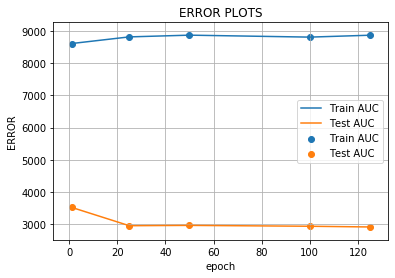

In [39]:
import matplotlib.pyplot as plt
error_train=[]
error_train.append(ERROR[0])
error_train.append(ERROR[24])
error_train.append(ERROR[49])
error_train.append(ERROR[99])
error_train.append(ERROR[124])

error_test=[]
error_test.append(ERROR_test[0])
error_test.append(ERROR_test[24])
error_test.append(ERROR_test[49])
error_test.append(ERROR_test[99])
error_test.append(ERROR_test[124])



epoch=[1,25,50,100,125]
plt.plot(epoch,error_train, label='Train AUC')
plt.plot(epoch,error_test, label='Test AUC')

plt.scatter(epoch,error_train, label='Train AUC')
plt.scatter(epoch,error_test, label='Test AUC')

plt.legend()
plt.xlabel("epoch")
plt.ylabel("ERROR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [34]:
print(p)
print(q)
print(abs(p-q))

[[-0.42336692  0.18547565 -0.14859036  0.34144407 -0.2081867   0.56016579
  -0.45242483 -0.09408813  0.2092732   0.18084126  0.19705191  0.00421916
  -0.0796037   0.33852802  0.02266721]]
[ 0.03311893 -0.05210903  0.05414381 -0.02923202  0.0009874   0.05806432
 -0.00529267  0.01576004  0.01707206  0.01598169  0.04208941  0.05329826
 -0.03741714 -0.01021055 -0.03622269]
[[0.45648584 0.23758468 0.20273417 0.37067609 0.2091741  0.50210147
  0.44713216 0.10984817 0.19220114 0.16485957 0.15496249 0.04907911
  0.04218655 0.34873856 0.0588899 ]]
